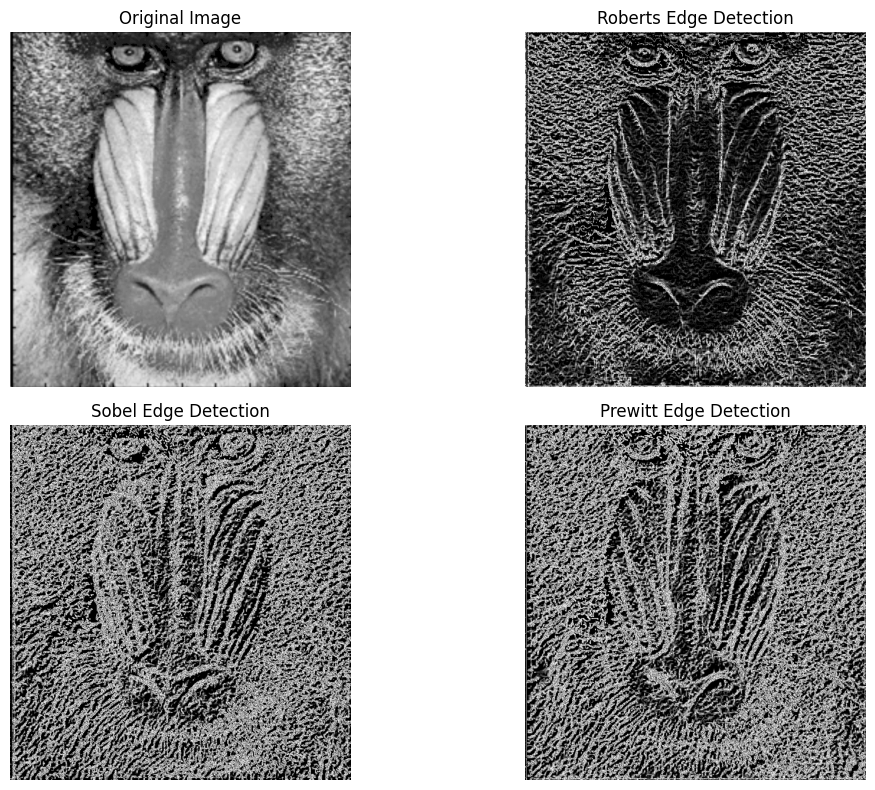

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def roberts_operator(image):
    """Apply the Roberts operator to an image."""
    # Roberts kernels
    kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

    # Apply kernels to the image
    img_x = cv2.filter2D(image, -1, kernel_x)
    img_y = cv2.filter2D(image, -1, kernel_y)

    # Calculate the magnitude of the gradients
    img_roberts = np.sqrt(np.square(img_x) + np.square(img_y))
    img_roberts = np.uint8(img_roberts)

    return img_roberts

def sobel_operator(image):
    """Apply the Sobel operator to an image using explicit convolution matrices."""
    # Sobel kernels
    kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]], dtype=np.float32)

    kernel_y = np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]], dtype=np.float32)

    # Apply kernels to the image
    img_sobel_x = cv2.filter2D(image, -1, kernel_x)
    img_sobel_y = cv2.filter2D(image, -1, kernel_y)

    # Calculate the magnitude of the gradients
    img_sobel = np.sqrt(np.square(img_sobel_x) + np.square(img_sobel_y))
    img_sobel = np.uint8(img_sobel)

    return img_sobel

def prewitt_operator(image):
    """Apply the Prewitt operator to an image."""
    # Prewitt kernels
    kernel_x = np.array([[1, 0, -1],
                         [1, 0, -1],
                         [1, 0, -1]], dtype=np.float32)

    kernel_y = np.array([[1, 1, 1],
                         [0, 0, 0],
                         [-1, -1, -1]], dtype=np.float32)

    # Apply kernels to the image
    img_prewitt_x = cv2.filter2D(image, -1, kernel_x)
    img_prewitt_y = cv2.filter2D(image, -1, kernel_y)

    # Calculate the magnitude of the gradients
    img_prewitt = np.sqrt(np.square(img_prewitt_x) + np.square(img_prewitt_y))
    img_prewitt = np.uint8(img_prewitt)

    return img_prewitt

def main():
    # Load image in grayscale
    image = cv2.imread('/content/image.png', cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Could not read the image.")
        return

    # Apply edge detection operators
    edges_roberts = roberts_operator(image)
    edges_sobel = sobel_operator(image)
    edges_prewitt = prewitt_operator(image)

    # Display the results
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(edges_roberts, cmap='gray')
    plt.title('Roberts Edge Detection')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(edges_sobel, cmap='gray')
    plt.title('Sobel Edge Detection')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(edges_prewitt, cmap='gray')
    plt.title('Prewitt Edge Detection')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
